In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from matplotlib import image

In [2]:
import sklearn

## First Project(Bank deposits)

In [3]:
bank_data=pd.read_csv(r"C:\Users\harsh\Downloads\credit_risk_dataset.csv")
bank_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [4]:
import re

In [5]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32581 entries, 0 to 32580
Data columns (total 12 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   person_age                  32581 non-null  int64  
 1   person_income               32581 non-null  int64  
 2   person_home_ownership       32581 non-null  object 
 3   person_emp_length           31686 non-null  float64
 4   loan_intent                 32581 non-null  object 
 5   loan_grade                  32581 non-null  object 
 6   loan_amnt                   32581 non-null  int64  
 7   loan_int_rate               29465 non-null  float64
 8   loan_status                 32581 non-null  int64  
 9   loan_percent_income         32581 non-null  float64
 10  cb_person_default_on_file   32581 non-null  object 
 11  cb_person_cred_hist_length  32581 non-null  int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 3.0+ MB


In [6]:
bank_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [7]:
bank_data.isnull().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [8]:
bank_data=bank_data[bank_data['person_emp_length'].notna()]
bank_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [9]:
bank_data=bank_data[bank_data['loan_int_rate'].notna()]
bank_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...
32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [10]:
bank_data=bank_data.reset_index()
bank_data

,index,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
28633,32576,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0,0.11,N,30
28634,32577,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0,0.15,N,19
28635,32578,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,1,0.46,N,28
28636,32579,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0,0.10,N,26


In [11]:
bank_data.isnull().sum()

index                         0
person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [12]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       28638 non-null  int64  
 1   person_age                  28638 non-null  int64  
 2   person_income               28638 non-null  int64  
 3   person_home_ownership       28638 non-null  object 
 4   person_emp_length           28638 non-null  float64
 5   loan_intent                 28638 non-null  object 
 6   loan_grade                  28638 non-null  object 
 7   loan_amnt                   28638 non-null  int64  
 8   loan_int_rate               28638 non-null  float64
 9   loan_status                 28638 non-null  int64  
 10  loan_percent_income         28638 non-null  float64
 11  cb_person_default_on_file   28638 non-null  object 
 12  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(6), object

### In this bank data the target variable is  loan_status
### loan_status is discrete variable so we perform classification task

In [13]:
y_data=bank_data['loan_status']
x_data=bank_data.drop('index',axis=1)

In [14]:
x_data=x_data.drop('loan_status',axis=1)

In [15]:
x_data

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,0.55,Y,4
...,...,...,...,...,...,...,...,...,...,...,...
28633,57,53000,MORTGAGE,1.0,PERSONAL,C,5800,13.16,0.11,N,30
28634,54,120000,MORTGAGE,4.0,PERSONAL,A,17625,7.49,0.15,N,19
28635,65,76000,RENT,3.0,HOMEIMPROVEMENT,B,35000,10.99,0.46,N,28
28636,56,150000,MORTGAGE,5.0,PERSONAL,B,15000,11.48,0.10,N,26


In [16]:
y_data

0        1
1        0
2        1
3        1
4        1
        ..
28633    0
28634    0
28635    1
28636    0
28637    0
Name: loan_status, Length: 28638, dtype: int64

In [163]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(x_data, y_data, train_size=0.75,stratify=bank_data['loan_status'], random_state=100)

In [18]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(21478, 11) (21478,)
(7160, 11) (7160,)


In [19]:
y_train

9369     0
28113    1
18599    0
13688    1
28564    0
        ..
4945     0
15620    1
9915     0
20368    0
3401     1
Name: loan_status, Length: 21478, dtype: int64

### Selecting categorical and numerical columns

In [20]:
bank_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28638 entries, 0 to 28637
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   index                       28638 non-null  int64  
 1   person_age                  28638 non-null  int64  
 2   person_income               28638 non-null  int64  
 3   person_home_ownership       28638 non-null  object 
 4   person_emp_length           28638 non-null  float64
 5   loan_intent                 28638 non-null  object 
 6   loan_grade                  28638 non-null  object 
 7   loan_amnt                   28638 non-null  int64  
 8   loan_int_rate               28638 non-null  float64
 9   loan_status                 28638 non-null  int64  
 10  loan_percent_income         28638 non-null  float64
 11  cb_person_default_on_file   28638 non-null  object 
 12  cb_person_cred_hist_length  28638 non-null  int64  
dtypes: float64(3), int64(6), object

In [21]:
x_train_cat=X_train.select_dtypes(include=['object'])
x_train_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
9369,RENT,MEDICAL,C,Y
28113,RENT,MEDICAL,D,Y
18599,RENT,DEBTCONSOLIDATION,C,Y
13688,MORTGAGE,DEBTCONSOLIDATION,F,Y
28564,RENT,EDUCATION,C,N
...,...,...,...,...
4945,RENT,HOMEIMPROVEMENT,D,Y
15620,RENT,EDUCATION,E,N
9915,MORTGAGE,MEDICAL,B,N
20368,MORTGAGE,VENTURE,D,Y


In [22]:
x_train_num=X_train.select_dtypes(include=['int64','float64'])
x_train_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
9369,25,37500,1.0,10000,15.96,0.27,4
28113,37,60000,1.0,10000,15.99,0.17,17
18599,28,66920,12.0,5000,14.26,0.07,8
13688,25,133000,8.0,3000,17.90,0.02,2
28564,63,1782000,13.0,12025,14.27,0.01,30
...,...,...,...,...,...,...,...
4945,24,116300,6.0,5000,14.96,0.04,4
15620,21,26000,2.0,7750,16.70,0.30,3
9915,22,73000,3.0,17000,11.99,0.23,3
20368,33,60000,1.0,17000,16.07,0.28,5


#### Rescaling numerical columns data using standardization

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [24]:
x_train_num_rescaled = pd.DataFrame(scaler.fit_transform(x_train_num),
                                     columns = x_train_num.columns, 
                                    index = x_train_num.index)
x_train_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
9369,-0.433380,-0.557541,-0.904252,0.055368,1.517521,0.943303,-0.444951
28113,1.464819,-0.124609,-0.904252,0.055368,1.526798,0.004650,2.753722
18599,0.041170,0.008542,1.714776,-0.734911,0.991829,-0.934003,0.539256
13688,-0.433380,1.280014,0.762402,-1.051023,2.117429,-1.403329,-0.937054
28564,5.577582,33.009093,1.952870,0.375431,0.994921,-1.497195,5.952394


In [25]:
x_train_num_rescaled['person_age'].std()

1.0000232804479232

In [26]:
x_train_num_rescaled.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
count,2.147800e+04,2.147800e+04,2.147800e+04,2.147800e+04,2.147800e+04,2.147800e+04,2.147800e+04
mean,1.796372e-16,-6.682635e-17,-1.455623e-17,3.308235e-18,-1.548254e-16,1.468856e-16,1.174423e-17
std,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00,1.000023e+00
min,-1.224296e+00,-1.202128e+00,-1.142345e+00,-1.446162e+00,-1.741773e+00,-1.591060e+00,-9.370540e-01
25%,-7.497463e-01,-5.208280e-01,-6.661584e-01,-7.349110e-01,-9.748806e-01,-7.462724e-01,-6.910023e-01
50%,-2.751967e-01,-2.015746e-01,-1.899715e-01,-2.607435e-01,-1.935681e-02,-1.830806e-01,-4.449506e-01
75%,3.575362e-01,2.602192e-01,5.243089e-01,4.505076e-01,7.506284e-01,5.678418e-01,5.392563e-01
max,1.839042e+01,3.796922e+01,2.814315e+01,4.006763e+00,3.762538e+00,5.730433e+00,5.952394e+00


#### Rescaling categorical using label encoding/one-hot encoding

- loan_grade data is ordinal data so we have to use label encoding for that column
- for remaining categorical columns we just apply one hot encoding

In [27]:
x_train_cat.head(5)

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
9369,RENT,MEDICAL,C,Y
28113,RENT,MEDICAL,D,Y
18599,RENT,DEBTCONSOLIDATION,C,Y
13688,MORTGAGE,DEBTCONSOLIDATION,F,Y
28564,RENT,EDUCATION,C,N


In [28]:
x_train_cat['loan_grade'].unique()

array(['C', 'D', 'F', 'B', 'A', 'E', 'G'], dtype=object)

In [29]:
# label encoding technique
loan_grade_col = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5,'F': 6,'G' : 7}

x_train_cat['loan_grade'] = x_train_cat['loan_grade'].apply(lambda x : loan_grade_col[x])

x_train_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
9369,RENT,MEDICAL,3,Y
28113,RENT,MEDICAL,4,Y
18599,RENT,DEBTCONSOLIDATION,3,Y
13688,MORTGAGE,DEBTCONSOLIDATION,6,Y
28564,RENT,EDUCATION,3,N


In [30]:
x_train_cat['person_home_ownership'].unique()

array(['RENT', 'MORTGAGE', 'OWN', 'OTHER'], dtype=object)

In [31]:
x_train_cat['loan_intent'].unique()

array(['MEDICAL', 'DEBTCONSOLIDATION', 'EDUCATION', 'VENTURE',
       'HOMEIMPROVEMENT', 'PERSONAL'], dtype=object)

In [32]:
x_train_cat['cb_person_default_on_file'].unique()

array(['Y', 'N'], dtype=object)

In [33]:
x_train_cat_le=pd.DataFrame(x_train_cat['loan_grade'])

In [34]:
x_train_cat_oe=x_train_cat.drop('loan_grade',axis=1)
x_train_cat_oe.head(3)

,person_home_ownership,loan_intent,cb_person_default_on_file
9369,RENT,MEDICAL,Y
28113,RENT,MEDICAL,Y
18599,RENT,DEBTCONSOLIDATION,Y


In [35]:
x_train_cat_oe['person_home_ownership'].value_counts()

RENT        10914
MORTGAGE     8853
OWN          1636
OTHER          75
Name: person_home_ownership, dtype: int64

In [36]:
x_train_cat_oe['loan_intent'].value_counts()

EDUCATION            4261
MEDICAL              3932
VENTURE              3779
PERSONAL             3720
DEBTCONSOLIDATION    3417
HOMEIMPROVEMENT      2369
Name: loan_intent, dtype: int64

In [37]:
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(drop='first',min_frequency=4000, sparse=False)
encoder.fit(x_train_cat_oe)
x_train_cat_ohe = pd.DataFrame(encoder.transform(x_train_cat_oe), 
                               columns=encoder.get_feature_names_out(x_train_cat_oe.columns), 
                               index = x_train_cat.index)

x_train_cat_ohe.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_infrequent_sklearn,cb_person_default_on_file_infrequent_sklearn
9369,1.0,0.0,1.0,1.0
28113,1.0,0.0,1.0,1.0
18599,1.0,0.0,1.0,1.0
13688,0.0,0.0,1.0,1.0
28564,1.0,0.0,0.0,0.0


In [38]:
type(x_train_cat_le)

pandas.core.frame.DataFrame

In [39]:
x_train_cat_le

,loan_grade
9369,3
28113,4
18599,3
13688,6
28564,3
...,...
4945,4
15620,5
9915,2
20368,4


In [40]:
x_train_cat_le

,loan_grade
9369,3
28113,4
18599,3
13688,6
28564,3
...,...
4945,4
15620,5
9915,2
20368,4


In [41]:
x_train_cat_rescaled=pd.concat([x_train_cat_le, x_train_cat_ohe], axis=1)
x_train_cat_rescaled

,loan_grade,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_infrequent_sklearn,cb_person_default_on_file_infrequent_sklearn
9369,3,1.0,0.0,1.0,1.0
28113,4,1.0,0.0,1.0,1.0
18599,3,1.0,0.0,1.0,1.0
13688,6,0.0,0.0,1.0,1.0
28564,3,1.0,0.0,0.0,0.0
...,...,...,...,...,...
4945,4,1.0,0.0,1.0,1.0
15620,5,1.0,0.0,0.0,0.0
9915,2,0.0,0.0,1.0,0.0
20368,4,0.0,0.0,1.0,1.0


In [42]:
x_train_transformed=pd.concat([x_train_num_rescaled, x_train_cat_rescaled], axis=1)
x_train_transformed

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_infrequent_sklearn,cb_person_default_on_file_infrequent_sklearn
9369,-0.433380,-0.557541,-0.904252,0.055368,1.517521,0.943303,-0.444951,3,1.0,0.0,1.0,1.0
28113,1.464819,-0.124609,-0.904252,0.055368,1.526798,0.004650,2.753722,4,1.0,0.0,1.0,1.0
18599,0.041170,0.008542,1.714776,-0.734911,0.991829,-0.934003,0.539256,3,1.0,0.0,1.0,1.0
13688,-0.433380,1.280014,0.762402,-1.051023,2.117429,-1.403329,-0.937054,6,0.0,0.0,1.0,1.0
28564,5.577582,33.009093,1.952870,0.375431,0.994921,-1.497195,5.952394,3,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
4945,-0.591563,0.958682,0.286215,-0.734911,1.208290,-1.215599,-0.444951,4,1.0,0.0,1.0,1.0
15620,-1.066113,-0.778817,-0.666158,-0.300257,1.746352,1.224899,-0.691002,5,1.0,0.0,0.0,0.0
9915,-0.907929,0.125529,-0.428065,1.161759,0.289874,0.567842,-0.691002,2,0.0,0.0,1.0,0.0
20368,0.832086,-0.124609,-0.904252,1.161759,1.551537,1.037168,-0.198899,4,0.0,0.0,1.0,1.0


### Rescaling numerical test data using standardization

In [43]:
x_test_cat=X_test.select_dtypes(include=['object'])
x_test_cat

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
24697,RENT,DEBTCONSOLIDATION,C,N
4133,RENT,EDUCATION,B,N
3104,MORTGAGE,EDUCATION,C,Y
8340,RENT,PERSONAL,D,Y
713,OWN,DEBTCONSOLIDATION,D,N
...,...,...,...,...
18571,OWN,EDUCATION,B,N
18362,MORTGAGE,EDUCATION,B,N
18725,RENT,PERSONAL,A,N
1913,MORTGAGE,DEBTCONSOLIDATION,A,N


In [44]:
x_test_num=X_test.select_dtypes(include=['int64','float64'])
x_test_num

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
24697,28,24000,0.0,10000,12.87,0.42,8
4133,22,30000,0.0,5000,10.33,0.17,3
3104,23,37344,0.0,3200,12.68,0.09,2
8340,26,99996,7.0,8000,16.32,0.08,3
713,21,22000,2.0,4000,15.05,0.18,4
...,...,...,...,...,...,...,...
18571,29,45000,0.0,6800,10.62,0.15,5
18362,29,44000,3.0,5500,10.99,0.13,7
18725,29,63533,0.0,5400,7.66,0.08,7
1913,25,30576,5.0,10000,6.03,0.33,4


In [45]:
x_test_num_rescaled = pd.DataFrame(scaler.transform(x_test_num),
                                     columns = x_test_num.columns, 
                                    index = x_test_num.index)
x_test_num_rescaled.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
24697,0.041170,-0.817300,-1.142345,0.055368,0.561997,2.351282,0.539256
4133,-0.907929,-0.701851,-1.142345,-0.734911,-0.223449,0.004650,-0.691002
3104,-0.749746,-0.560542,-1.142345,-1.019411,0.503244,-0.746272,-0.937054
8340,-0.275197,0.644970,0.524309,-0.260744,1.628844,-0.840138,-0.691002
713,-1.066113,-0.855782,-0.666158,-0.892967,1.236121,0.098515,-0.444951


#### Rescaling categorical columns using onehot/label encoding

In [46]:
loan_grade_col = {'A' : 1, 'B' : 2, 'C' : 3, 'D' : 4, 'E' : 5,'F': 6,'G' : 7}

x_test_cat['loan_grade'] = x_test_cat['loan_grade'].apply(lambda x : loan_grade_col[x])

x_test_cat.head()

,person_home_ownership,loan_intent,loan_grade,cb_person_default_on_file
24697,RENT,DEBTCONSOLIDATION,3,N
4133,RENT,EDUCATION,2,N
3104,MORTGAGE,EDUCATION,3,Y
8340,RENT,PERSONAL,4,Y
713,OWN,DEBTCONSOLIDATION,4,N


In [47]:
x_test_cat_le=pd.DataFrame(x_test_cat['loan_grade'])

In [48]:
x_test_cat_oe=x_test_cat.drop('loan_grade',axis=1)
x_test_cat_oe.head(3)

,person_home_ownership,loan_intent,cb_person_default_on_file
24697,RENT,DEBTCONSOLIDATION,N
4133,RENT,EDUCATION,N
3104,MORTGAGE,EDUCATION,Y


In [49]:
x_test_cat_oe['person_home_ownership'].value_counts()

RENT        3637
MORTGAGE    2948
OWN          556
OTHER         19
Name: person_home_ownership, dtype: int64

In [50]:
x_test_cat_oe['loan_intent'].value_counts()

EDUCATION            1443
MEDICAL              1361
VENTURE              1222
PERSONAL             1157
DEBTCONSOLIDATION    1148
HOMEIMPROVEMENT       829
Name: loan_intent, dtype: int64

In [51]:
from sklearn.preprocessing import OneHotEncoder

x_test_cat_ohe = pd.DataFrame(encoder.transform(x_test_cat_oe), 
                               columns=encoder.get_feature_names_out(x_test_cat_oe.columns), 
                               index = x_test_cat_oe.index)

x_test_cat_ohe.head()

,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_infrequent_sklearn,cb_person_default_on_file_infrequent_sklearn
24697,1.0,0.0,1.0,0.0
4133,1.0,0.0,0.0,0.0
3104,0.0,0.0,0.0,1.0
8340,1.0,0.0,1.0,1.0
713,0.0,1.0,1.0,0.0


In [52]:
x_test_cat_rescaled=pd.concat([x_test_cat_le, x_test_cat_ohe], axis=1)
x_test_cat_rescaled.head(3)

,loan_grade,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_infrequent_sklearn,cb_person_default_on_file_infrequent_sklearn
24697,3,1.0,0.0,1.0,0.0
4133,2,1.0,0.0,0.0,0.0
3104,3,0.0,0.0,0.0,1.0


In [53]:
x_test_transformed=pd.concat([x_test_num_rescaled, x_test_cat_rescaled], axis=1)
x_test_transformed

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,loan_grade,person_home_ownership_RENT,person_home_ownership_infrequent_sklearn,loan_intent_infrequent_sklearn,cb_person_default_on_file_infrequent_sklearn
24697,0.041170,-0.817300,-1.142345,0.055368,0.561997,2.351282,0.539256,3,1.0,0.0,1.0,0.0
4133,-0.907929,-0.701851,-1.142345,-0.734911,-0.223449,0.004650,-0.691002,2,1.0,0.0,0.0,0.0
3104,-0.749746,-0.560542,-1.142345,-1.019411,0.503244,-0.746272,-0.937054,3,0.0,0.0,0.0,1.0
8340,-0.275197,0.644970,0.524309,-0.260744,1.628844,-0.840138,-0.691002,4,1.0,0.0,1.0,1.0
713,-1.066113,-0.855782,-0.666158,-0.892967,1.236121,0.098515,-0.444951,4,0.0,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
18571,0.199353,-0.413230,-1.142345,-0.450411,-0.133772,-0.183081,-0.198899,2,0.0,1.0,0.0,0.0
18362,0.199353,-0.432471,-0.428065,-0.655883,-0.019357,-0.370811,0.293205,2,0.0,0.0,0.0,0.0
18725,0.199353,-0.056629,-1.142345,-0.671689,-1.049096,-0.840138,0.293205,1,1.0,0.0,1.0,0.0
1913,-0.433380,-0.690768,0.048122,0.055368,-1.553143,1.506495,-0.444951,1,0.0,0.0,1.0,0.0


## Algorithms

### decision Tree Algorithm

In [112]:
from sklearn.tree import DecisionTreeClassifier
d=DecisionTreeClassifier()
d.fit(x_train_transformed,y_train)
y_train_pred=d.predict(x_train_transformed)
y_pred=d.predict(x_test_transformed)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_pred))

1.0
0.8671787709497206


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

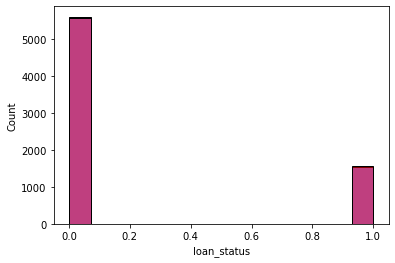

In [113]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_pred, color='red', alpha=0.5)

### Random forest 

In [115]:
from sklearn.ensemble import RandomForestClassifier
rf=RandomForestClassifier()
rf.fit(x_train_transformed,y_train)
y_pred=rf.predict(x_test_transformed)
y_train_pred=rf.predict(x_train_transformed)
print(metrics.accuracy_score(y_train,y_train_pred))
print(metrics.accuracy_score(y_test,y_pred))

1.0
0.910754189944134


<AxesSubplot:xlabel='loan_status', ylabel='Count'>

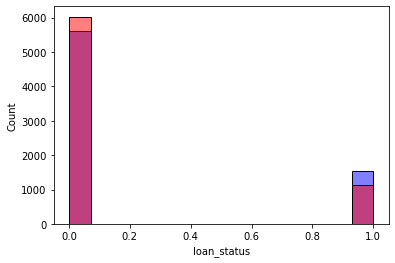

In [116]:
sns.histplot(y_test, color='blue', alpha=0.5)
sns.histplot(y_pred, color='red', alpha=0.5)

### Using MLP(Multi layer Perceptron)

In [178]:
import tensorflow
import tensorflow.keras
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense,BatchNormalization,Dropout
model_=Sequential()

In [179]:
model_.add(Dense(30,activation="relu",input_dim=12, kernel_initializer='he_uniform'))
model_.add(Dense(22,activation="relu", kernel_initializer='he_normal'))
model_.add(Dense(19,activation="relu", kernel_initializer='he_uniform'))
model_.add(Dense(11,activation="relu", kernel_initializer='glorot_uniform'))
model_.add(Dense(9,activation="relu", kernel_initializer='he_uniform'))
model_.add(Dense(8,activation="relu", kernel_initializer='he_uniform'))
model_.add(Dense(4,activation="relu", kernel_initializer='he_uniform'))
model_.add(BatchNormalization())
model_.add(Dense(1,activation="sigmoid"))

In [180]:
model_.compile(optimizer="adam",loss="binary_crossentropy",metrics=['accuracy'])

In [181]:
save=model_.fit(x_train_transformed,y_train,batch_size=10,epochs=50,verbose=1,validation_split =0.2)

Epoch 1/50
1719/1719 [==============================] - 3s 1ms/step - loss: 0.4209 - accuracy: 0.8157 - val_loss: 0.3557 - val_accuracy: 0.8666
Epoch 2/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3464 - accuracy: 0.8637 - val_loss: 0.3897 - val_accuracy: 0.8345
Epoch 3/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3354 - accuracy: 0.8699 - val_loss: 0.3154 - val_accuracy: 0.8720
Epoch 4/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3290 - accuracy: 0.8739 - val_loss: 0.4243 - val_accuracy: 0.8422
Epoch 5/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3245 - accuracy: 0.8750 - val_loss: 0.3167 - val_accuracy: 0.8822
Epoch 6/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3201 - accuracy: 0.8780 - val_loss: 0.2964 - val_accuracy: 0.8841
Epoch 7/50
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3130 - accuracy: 0.8802 - val_loss: 0.3045 - val_accuracy:

In [182]:
test_pred=model_.predict(x_test_transformed)

224/224 [==============================] - 0s 647us/step


In [183]:
test_pred=np.ravel(np.where(test_pred<0.5,0,1))
test_pred=pd.Series(test_pred)
test_pred.index=y_test.index
test_pred

24697    1
4133     0
3104     0
8340     0
713      0
        ..
18571    0
18362    0
18725    0
1913     0
15900    1
Length: 7160, dtype: int32

In [184]:
from sklearn import metrics
metrics.accuracy_score(y_test,test_pred)

0.8945530726256983

In [185]:
train_pred=model_.predict(x_train_transformed)

672/672 [==============================] - 0s 664us/step


In [186]:
train_pred=np.ravel(np.where(train_pred<0.5,0,1))
train_pred=pd.Series(train_pred)
train_pred.index=y_train.index
train_pred

9369     0
28113    1
18599    0
13688    1
28564    0
        ..
4945     0
15620    1
9915     0
20368    1
3401     1
Length: 21478, dtype: int32

In [187]:
from sklearn import metrics
metrics.accuracy_score(y_train,train_pred)

0.9058105968898408

In [188]:
train_loss=save.history['loss']
cv_loss=save.history['val_loss']

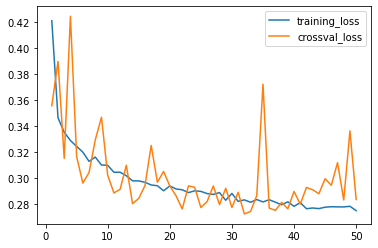

In [189]:
plt.plot(range(1,51),train_loss,label="training_loss")
plt.plot(range(1,51),cv_loss,label="crossval_loss")
plt.legend()